In [1]:
## jupyter notebook to simulate the range of the nuclear recoils in a given decay chain
## this notebook is tuned for the case of Rn-220 daughter implantation into 3 um SiO2 spheres

import numpy as np
import matplotlib.pyplot as plt
import alpha_recoil_sim as ar
import importlib

In [2]:
## make dictionary containing decay chain information for a given list of isotopes
path = "/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/Sphere_Recoils_MC"

iso_list = ['Po-216']

iso_dict = {}

for iso in iso_list:
    ciso = iso[:2].lower()
    cA = iso[-3:]
    iso_dict[iso] = ar.parse_decay_chain(path + "/decay_data/" + ciso + "_" + cA + "_decay_chain.txt")

In [3]:
## Load the Monte Carlo data from SRIM
import pickle

data_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/SRIM_Data/'

with open(data_path + 'SRIM_MC_events.pkl', 'rb') as f:
    MC_dict = pickle.load(f)

In [51]:
## Run over the isotopes and various shell materials, and save data
importlib.reload(ar)

sim_name = "Pb212_implant"
iso_list = ['Po-216']
shell_mat = ['SiO2']
shell_thick = [1] ## 1 nm thick SiO2 shell for starting decays
N = 20000

out_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/SRIM_Data/'

sim_dict = {}

for iso in iso_list:
    for j,shell in enumerate(shell_mat):

        print("Working on %d events for %s with %s shell"%(N, iso, shell))

        sphere_dict = {"inner_radius": 3000, "outer_shell_thick": shell_thick[j], 
                       "inner_material": "SiO2", "shell_material": shell,
                       "starting_loc": "shell"}

        sim_dict[iso + "_" + shell] = ar.sim_N_events(N, iso, iso_dict, sphere_dict, MC_dict)

with open(data_path + 'simulation_data_%s.pkl'%sim_name, 'wb') as f:
    pickle.dump(sim_dict, f)

Working on 20000 events for Po-216 with SiO2 shell


/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/Sphere_Recoils_MC/alpha_recoil_sim.py:218: RuntimeWarning: invalid value encountered in scalar divide
  ct = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/Sphere_Recoils_MC/alpha_recoil_sim.py:223: RuntimeWarning: invalid value encountered in divide
  u = u / np.linalg.norm(u)   # normalize the axis vector


In [19]:
with open(data_path + 'simulation_data_%s.pkl'%sim_name, 'rb') as f:
    sim_dict = pickle.load(f)

Found 9 bad points out of 20000: 0.045%


<Figure size 1200x600 with 0 Axes>

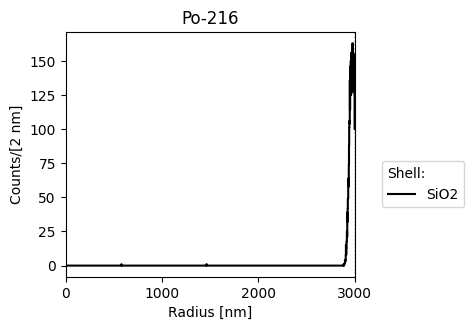

In [52]:
iso_list = ['Po-216']
shell_mat = ['SiO2']
shell_thick = [1]


# Make a plot of the final position distribution and escape fraction for each isotope
col_list = ['k', 'gold', 'gray']
importlib.reload(ar)

thresh_list = [0.5, 0.1, 0.01, 0.001]
sty = ['-', '--', ':']

fig_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/plots/'

df = plt.figure(facecolor='white', figsize=(12,6))
sf = plt.figure(facecolor='white', figsize=(12,6))
idx = 1

thickness_dict = {}

for iso in iso_list:
    for j,shell in enumerate(shell_mat):

        sphere_dict = {"inner_radius": 3000, "outer_shell_thick": shell_thick[j], "inner_material": "SiO2", "shell_material": shell}

        x, y, s = ar.analyze_simulation( sim_dict[iso + "_" + shell], sphere_dict )
        plt.figure(df.number)
        plt.subplot(2,3,idx)
        plt.step(x,y,color=col_list[j],where='mid', label=shell)
        plt.xlabel("Radius [nm]")
        plt.ylabel("Counts/[2 nm]")
        plt.xlim(0,sphere_dict['inner_radius'] + sphere_dict['outer_shell_thick'])


        thick = np.interp(thresh_list, s[::-1], x[::-1])
        thickness_dict[iso + "_" + shell] = thick

    plt.figure(df.number)
    yy = plt.ylim()
    rin = sphere_dict['inner_radius']
    plt.plot([rin, rin], yy, 'k:', lw=1)
    plt.ylim(yy)
    plt.title(iso)

    idx +=1

plt.figure(df.number)
#df.subplots_adjust(hspace=0.4)
leg=plt.legend(bbox_to_anchor=(1.07, 0.5), title="Shell:")
leg._legend_box.align = "left"
plt.tight_layout()
plt.savefig(fig_path + "range_vs_iso.pdf")




In [48]:
importlib.reload(ar)
sim_dict['Po-216_SiO2'][1].keys()

dict_keys(['parent', 'start_pos', 0, 1, 'final_momentum', 2, 'final_pos'])

[  6.55774214 -13.81410191  -2.32833982]


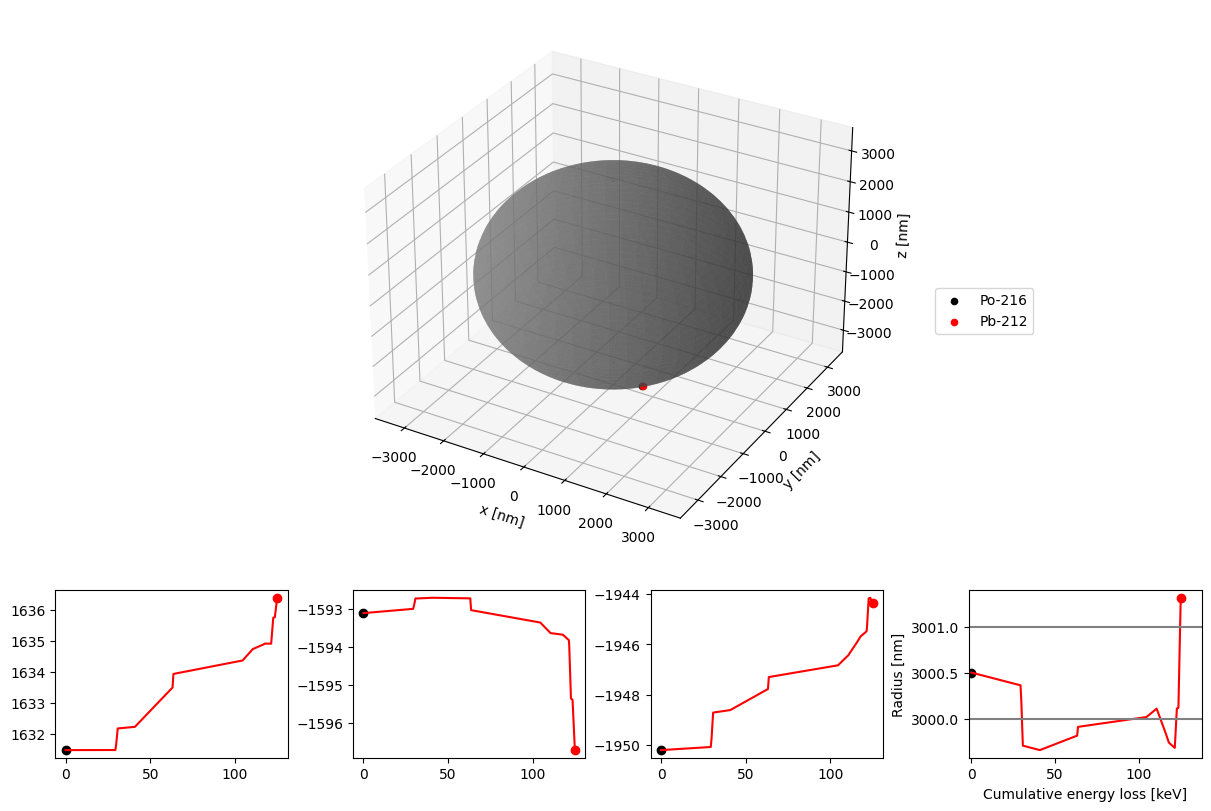

In [57]:
importlib.reload(ar)

iso = "Po-216"
shell = "SiO2"
num = 0

shell_mat = ['SiO2']
shell_thick = [1]

sphere_dict['shell_material'] = shell
sphere_dict['outer_shell_thick'] = 1

fig = ar.plot_event(sim_dict[iso + "_" + shell][num], sphere_dict, rad_lims=[-1,-1], sphere_coords=False)
print(sim_dict[iso + "_" + shell][num]['final_momentum'])
plt.savefig(fig_path + "examp_traj_%s_%s_%d.png"%(iso, shell, num), dpi=300)

plt.show()

In [35]:
sim_dict[iso + "_" + shell][num][3]

{'time': 50619.72515247222,
 'energy': 165.75471698113208,
 'iso': 'Pb-208',
 'traj': array([[ 1.65754717e+02, -1.83710463e+03, -1.80035440e+03,
          1.53858570e+03],
        [ 1.58170000e+02, -1.83710705e+03, -1.80033190e+03,
          1.53862607e+03],
        [ 1.57880000e+02, -1.83708623e+03, -1.80020916e+03,
          1.53884890e+03],
        [ 1.53800000e+02, -1.83694002e+03, -1.79935935e+03,
          1.54041247e+03],
        [ 1.51680000e+02, -1.83690049e+03, -1.79867602e+03,
          1.54166967e+03],
        [ 1.50630000e+02, -1.83682123e+03, -1.79697858e+03,
          1.54453189e+03],
        [ 1.47800000e+02, -1.83681101e+03, -1.79673124e+03,
          1.54493713e+03],
        [ 1.46310000e+02, -1.83678815e+03, -1.79647037e+03,
          1.54533042e+03],
        [ 1.45950000e+02, -1.83676051e+03, -1.79545662e+03,
          1.54692001e+03],
        [ 1.44950000e+02, -1.83675889e+03, -1.79468987e+03,
          1.54810678e+03],
        [ 1.43710000e+02, -1.83675738e+03, -1